In [1]:
import os
from datetime import date
%run {os.path.join('..', 'src', 'utils.py')}

In [2]:
#read our dataset
rfm_segmentation = pd.read_csv(os.path.join("..","data","rfm_segmentation.csv"))

#### These values can always be changed according to the marketing teams wishes
### Scoring Values For Recency
#### 4 - Tazecik
#### 3 - İletişimdeyiz
#### 2 - Gönlümüzdeler
#### 1 - Haber Yok

### Scoring Values For Frequency
#### 4 - Sürekli
#### 3 - Mükerrer
#### 2 - Arada Sırada 
#### 1 - Nadiren

### Scoring Values For Monetary
#### 4 - Platinum
#### 3 - Gold
#### 2 - Silver
#### 1 - Bronze

In [3]:
# Encoding data with Business logic
rfm_segmentation.R_Quartile[rfm_segmentation.R_Quartile == 1] = 'Haber Yok'
rfm_segmentation.R_Quartile[rfm_segmentation.R_Quartile == 2] = 'Gönlümüzdeler'
rfm_segmentation.R_Quartile[rfm_segmentation.R_Quartile == 3] = 'İletişimdeyiz'
rfm_segmentation.R_Quartile[rfm_segmentation.R_Quartile == 4] = 'Tazecik'
rfm_segmentation.F_Quartile[rfm_segmentation.F_Quartile == 1] = 'Nadiren'
rfm_segmentation.F_Quartile[rfm_segmentation.F_Quartile == 2] = 'Arada Sırada'
rfm_segmentation.F_Quartile[rfm_segmentation.F_Quartile == 3] = 'Mükerrer'
rfm_segmentation.F_Quartile[rfm_segmentation.F_Quartile == 4] = 'Sürekli'
rfm_segmentation.M_Quartile[rfm_segmentation.M_Quartile == 1] = 'Bronze'
rfm_segmentation.M_Quartile[rfm_segmentation.M_Quartile == 2] = 'Silver'
rfm_segmentation.M_Quartile[rfm_segmentation.M_Quartile == 3] = 'Gold'
rfm_segmentation.M_Quartile[rfm_segmentation.M_Quartile == 4] = 'Platinum'


In [4]:
Seg_score = rfm_segmentation[['provider_id','RFMScore','RFMScore_num']].copy()
Seg_score["Customer_class"] = rfm_segmentation['R_Quartile'].astype(str) +"-"+ rfm_segmentation["F_Quartile"]+"-"+ rfm_segmentation["M_Quartile"]

<AxesSubplot: >

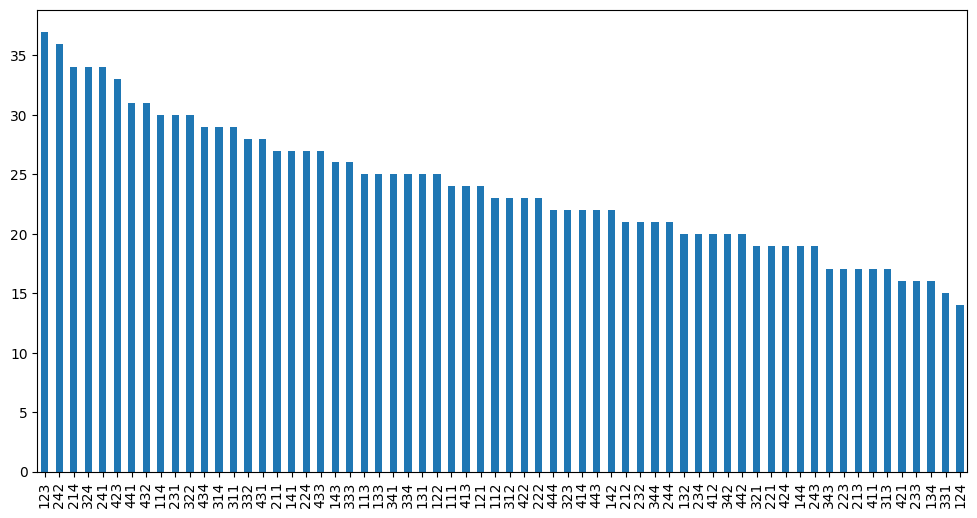

In [5]:
Seg_score['RFMScore'].value_counts().plot.bar(figsize=(12, 6))

<AxesSubplot: >

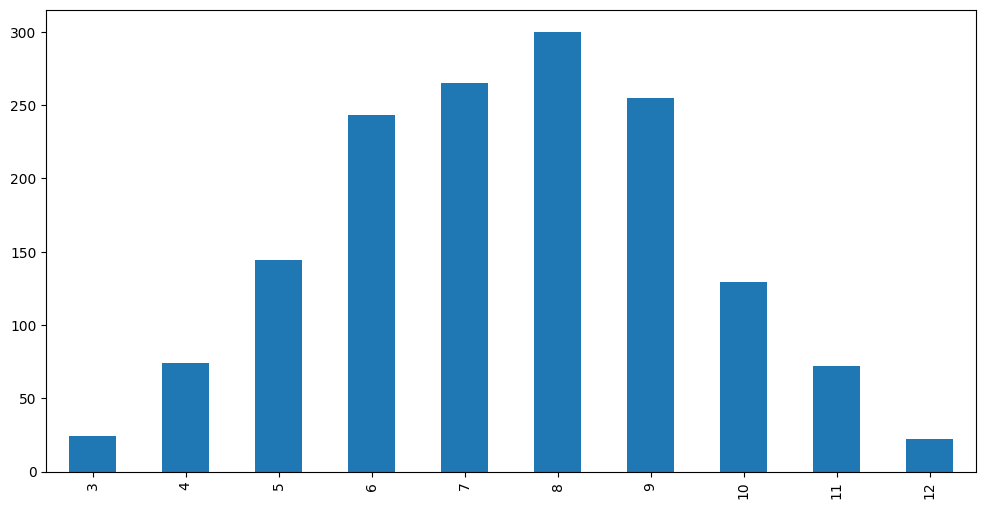

In [6]:
Seg_score['RFMScore_num'].value_counts().sort_index().plot.bar(figsize=(12, 6))

### Scoring Values For RFM Scores

#### 3-4 No Hope
#### 5-6-7 Has Potential
#### 8-9-10 Bright Future
#### 11-12 Elite / Premium


In [7]:
Seg_score['RFMScore_numb'] = Seg_score.loc[:, 'RFMScore_num']
Seg_score.RFMScore_num[Seg_score.RFMScore_num == 3] = 'Umut yok'
Seg_score.RFMScore_num[Seg_score.RFMScore_num == 4] = 'Umut yok'
Seg_score.RFMScore_num[Seg_score.RFMScore_num == 5] = 'Potansiyeli var'
Seg_score.RFMScore_num[Seg_score.RFMScore_num == 6] = 'Potansiyeli var'
Seg_score.RFMScore_num[Seg_score.RFMScore_num == 7] = 'Potansiyeli var'
Seg_score.RFMScore_num[Seg_score.RFMScore_num == 8] = 'Geleceği parlak'
Seg_score.RFMScore_num[Seg_score.RFMScore_num == 9] = 'Geleceği parlak'
Seg_score.RFMScore_num[Seg_score.RFMScore_num == 10] = 'Geleceği parlak'
Seg_score.RFMScore_num[Seg_score.RFMScore_num == 11] = 'Elit'
Seg_score.RFMScore_num[Seg_score.RFMScore_num == 12] = 'Elit'

In [8]:
Seg_score.rename(columns = {'RFMScore_num':'RFMScore_cat'}, inplace = True)

<AxesSubplot: >

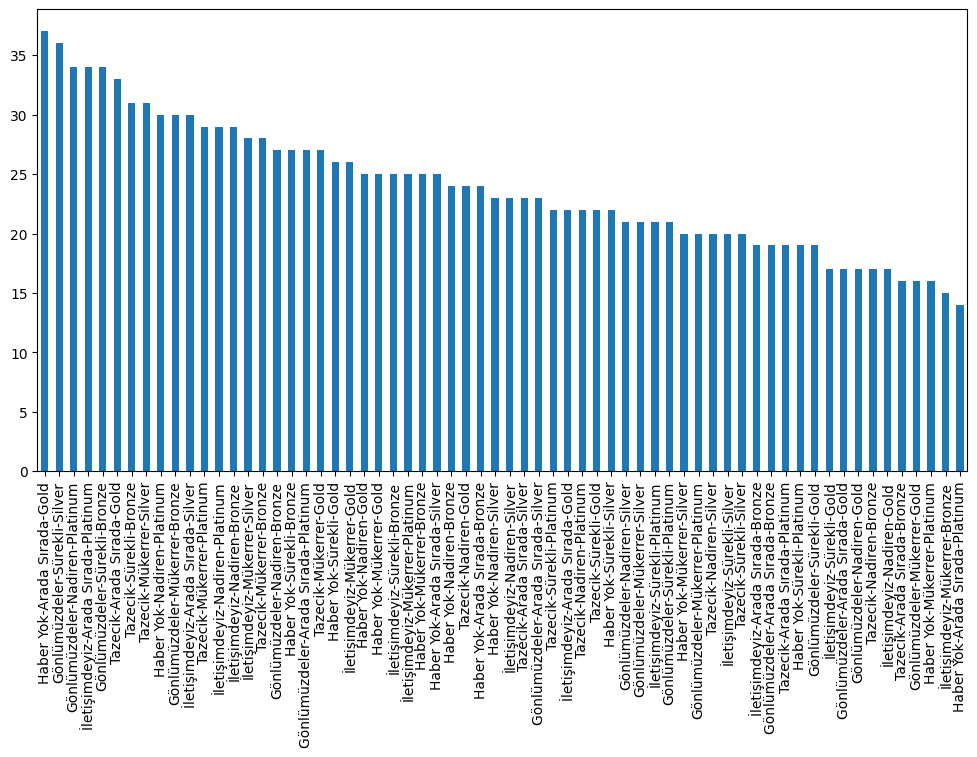

In [9]:
Seg_score['Customer_class'].value_counts().plot.bar(figsize=(12, 6))

<AxesSubplot: >

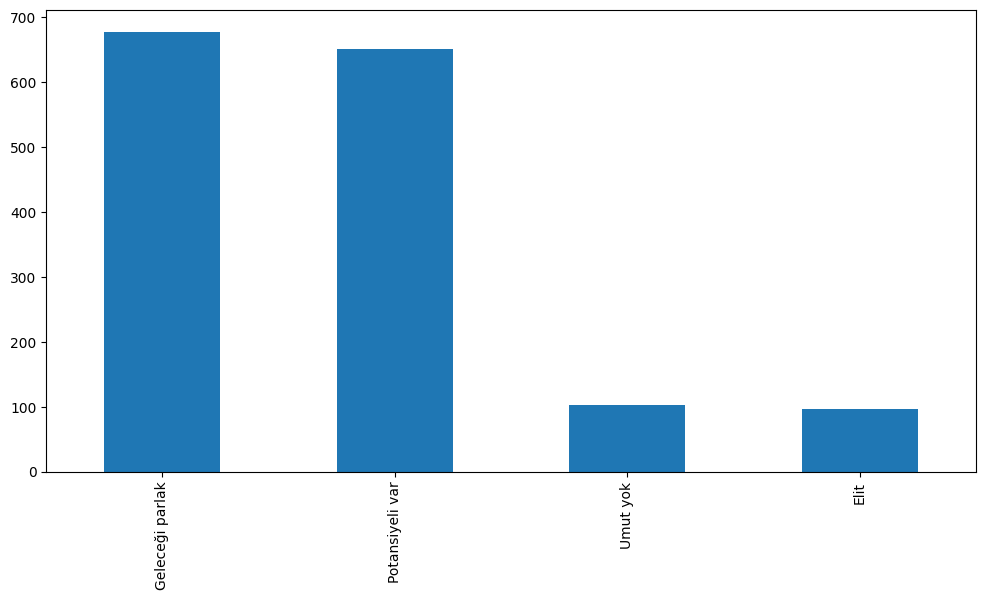

In [10]:
Seg_score['RFMScore_cat'].value_counts().plot.bar(figsize=(12, 6))

In [10]:
Seg_score.head()

,provider_id,RFMScore,RFMScore_cat,Customer_class,RFMScore_numb
0,117,223,Potansiyeli var,Gönlümüzdeler-Arada Sırada-Gold,7
1,143,314,Geleceği parlak,İletişimdeyiz-Nadiren-Platinum,8
2,159,422,Geleceği parlak,Tazecik-Arada Sırada-Silver,8
3,171,313,Potansiyeli var,İletişimdeyiz-Nadiren-Gold,7
4,173,314,Geleceği parlak,İletişimdeyiz-Nadiren-Platinum,8


In [11]:
Seg_score['date'] = date.today()

In [12]:
Seg_score.to_csv(os.path.join("..","data","segmentation.csv"),index=False)

In [13]:
# Saving result into the DB
if table_exists("staging","DUGUN_DS","B2B_segmentation") == True:
    print("Table exist, adding data to table")
    write_to_db(os.path.join("..","data","segmentation.csv"),"staging","DUGUN_DS","B2B_segmentation")
elif table_exists("staging","DUGUN_DS","B2B_segmentation") == False:
    print("Table os not exist, Creating table and adding data to table")
    #create_table("staging","DUGUN_DS")
    write_to_db(os.path.join("..","data","segmentation.csv"),"staging","DUGUN_DS","B2B_segmentation")

Table os not exist, Creating table and adding data to table
action is completed
